# snc variation coefficient comparison 

## Import required libraries

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import matplotlib as mpl  
import os  
import seaborn as sns  
import proplot as prl   

## Set variables 

In [4]:
threshold='0'
path_cmip_raw_data = '/home/hchaabani/Data/Snow/snc/cmip6/raw_data'
path_input = '/home/hchaabani/Hamid/PHD-mountain-climate/First_Part/Results/data/variabilities trends/coeff variability/spatial_avergaes/threshold_'+threshold
path_output = '/home/hchaabani/Hamid/PHD-mountain-climate/First_Part/Results/figures/heatmaps/coef_variability/threshold_'+threshold
cmip6_labels = os.listdir(path_cmip_raw_data)
products_labels = ['ESA_GF','ERA_LAND','ERA5', 
                   'SIM_35km']+cmip6_labels
parameters = ['snc_monthly_value_15','ext_days_with_snow_15']
imonth = [11,12,1,2,3,4]
months_labels = ['NOV','DEC','JAN','FEB','MAR','APR'] 
data_dic = {par:{mon:'data' for mon in months_labels} for par in parameters}

leg_title = 'variability in pourcentage'
max_leg = 200
min_leg = 0
bounds_labels =  ['altitude>=0m','altitude>=1000m','1000m-1500m','1500m-2000m','altitude>=2000m']

## Import and prepare data

In [5]:
for par in parameters:
    for mon in months_labels:
        data_dic[par][mon] = pd.read_excel(path_input+'/variability_coeff_'+par+'_'+mon+'.xlsx')

In [6]:
for par in parameters:
    for mon in months_labels:
        data_dic[par][mon] = data_dic[par][mon].drop('Unnamed: 0', axis=1).set_index('bound')

In [7]:
for par in parameters:
    for mon in months_labels:
        data_dic[par][mon].index = bounds_labels

## Plot

In [8]:
# This auxiliary function will help us in the formatting of the figures
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

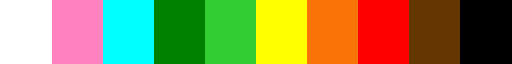

In [9]:
c0='white'
c1='pink'
c2='cyan' 
c3='green' 
c4='limegreen' 
c5='yellow'
c6 = 'orange'
c7='red' 
c8='brown'
c9= 'black'
from matplotlib.colors import ListedColormap, BoundaryNorm
#norm = BoundaryNorm(breakpoints,cmap)
cmap_init = ListedColormap([c0,c1,c2,c3,c4,c5,c6,c7,c8,c9])
cmap_init

In [10]:
products_labels = list(data_dic[par][mon].columns.values)

In [14]:
data_dic[par][mon].round(1)

,ESA_GF,ERA_LAND,ERA5,SIM_35km,EC-Earth3P-HR,IPSL-CM6A-ATM-HR,BCC-CSM2-HR,IPSL-CM6A-ATM-ICO-HR,IPSL-CM6A-ATM-ICO-VHR,CNRM-CM6-1-HR
altitude>=0m,152.4,90.2,188.7,81.8,60.0,95.9,113.4,70.5,69.2,113.4
altitude>=1000m,169.4,89.2,162.7,80.7,56.4,94.6,111.8,70.0,67.5,111.8
1000m-1500m,174.5,144.9,224.1,108.8,84.2,157.4,213.6,117.1,130.6,213.6
1500m-2000m,191.0,93.6,152.6,92.7,55.8,125.6,143.5,79.2,82.3,143.5
altitude>=2000m,168.6,83.4,101.6,72.6,40.6,81.3,83.8,63.2,57.2,83.8


/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/hchaabani/anaconda3/envs/first_part/li

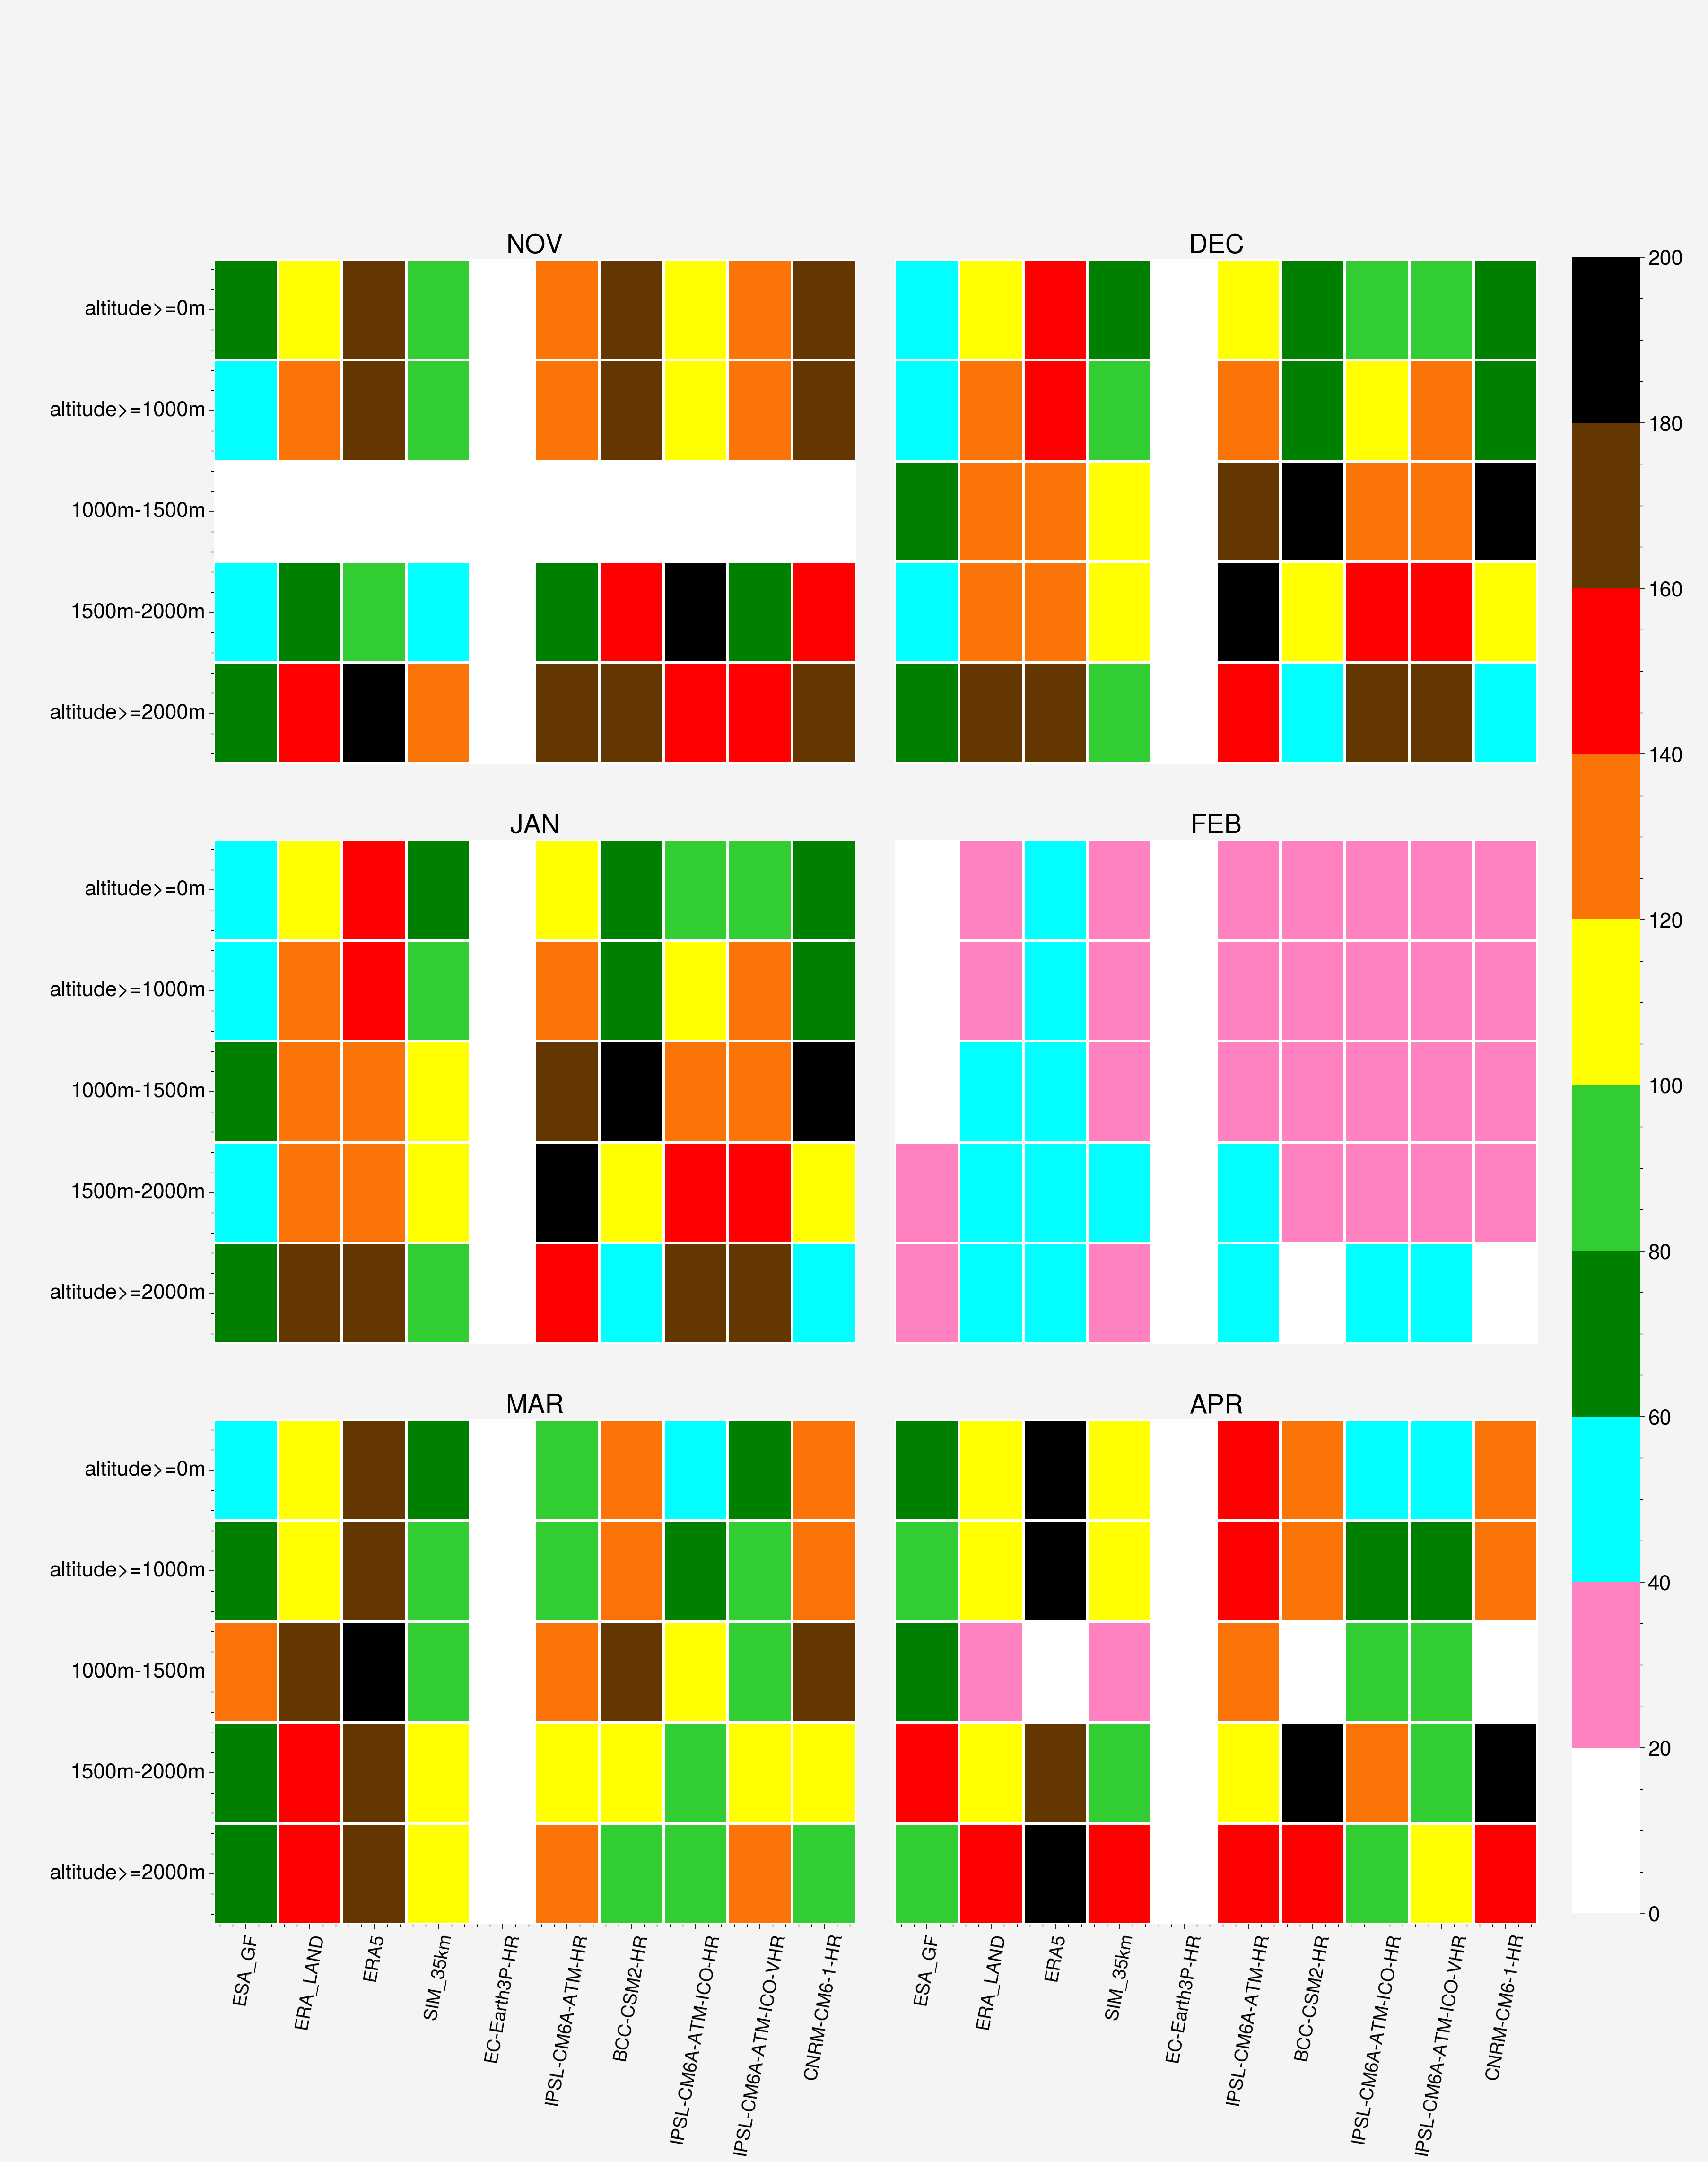

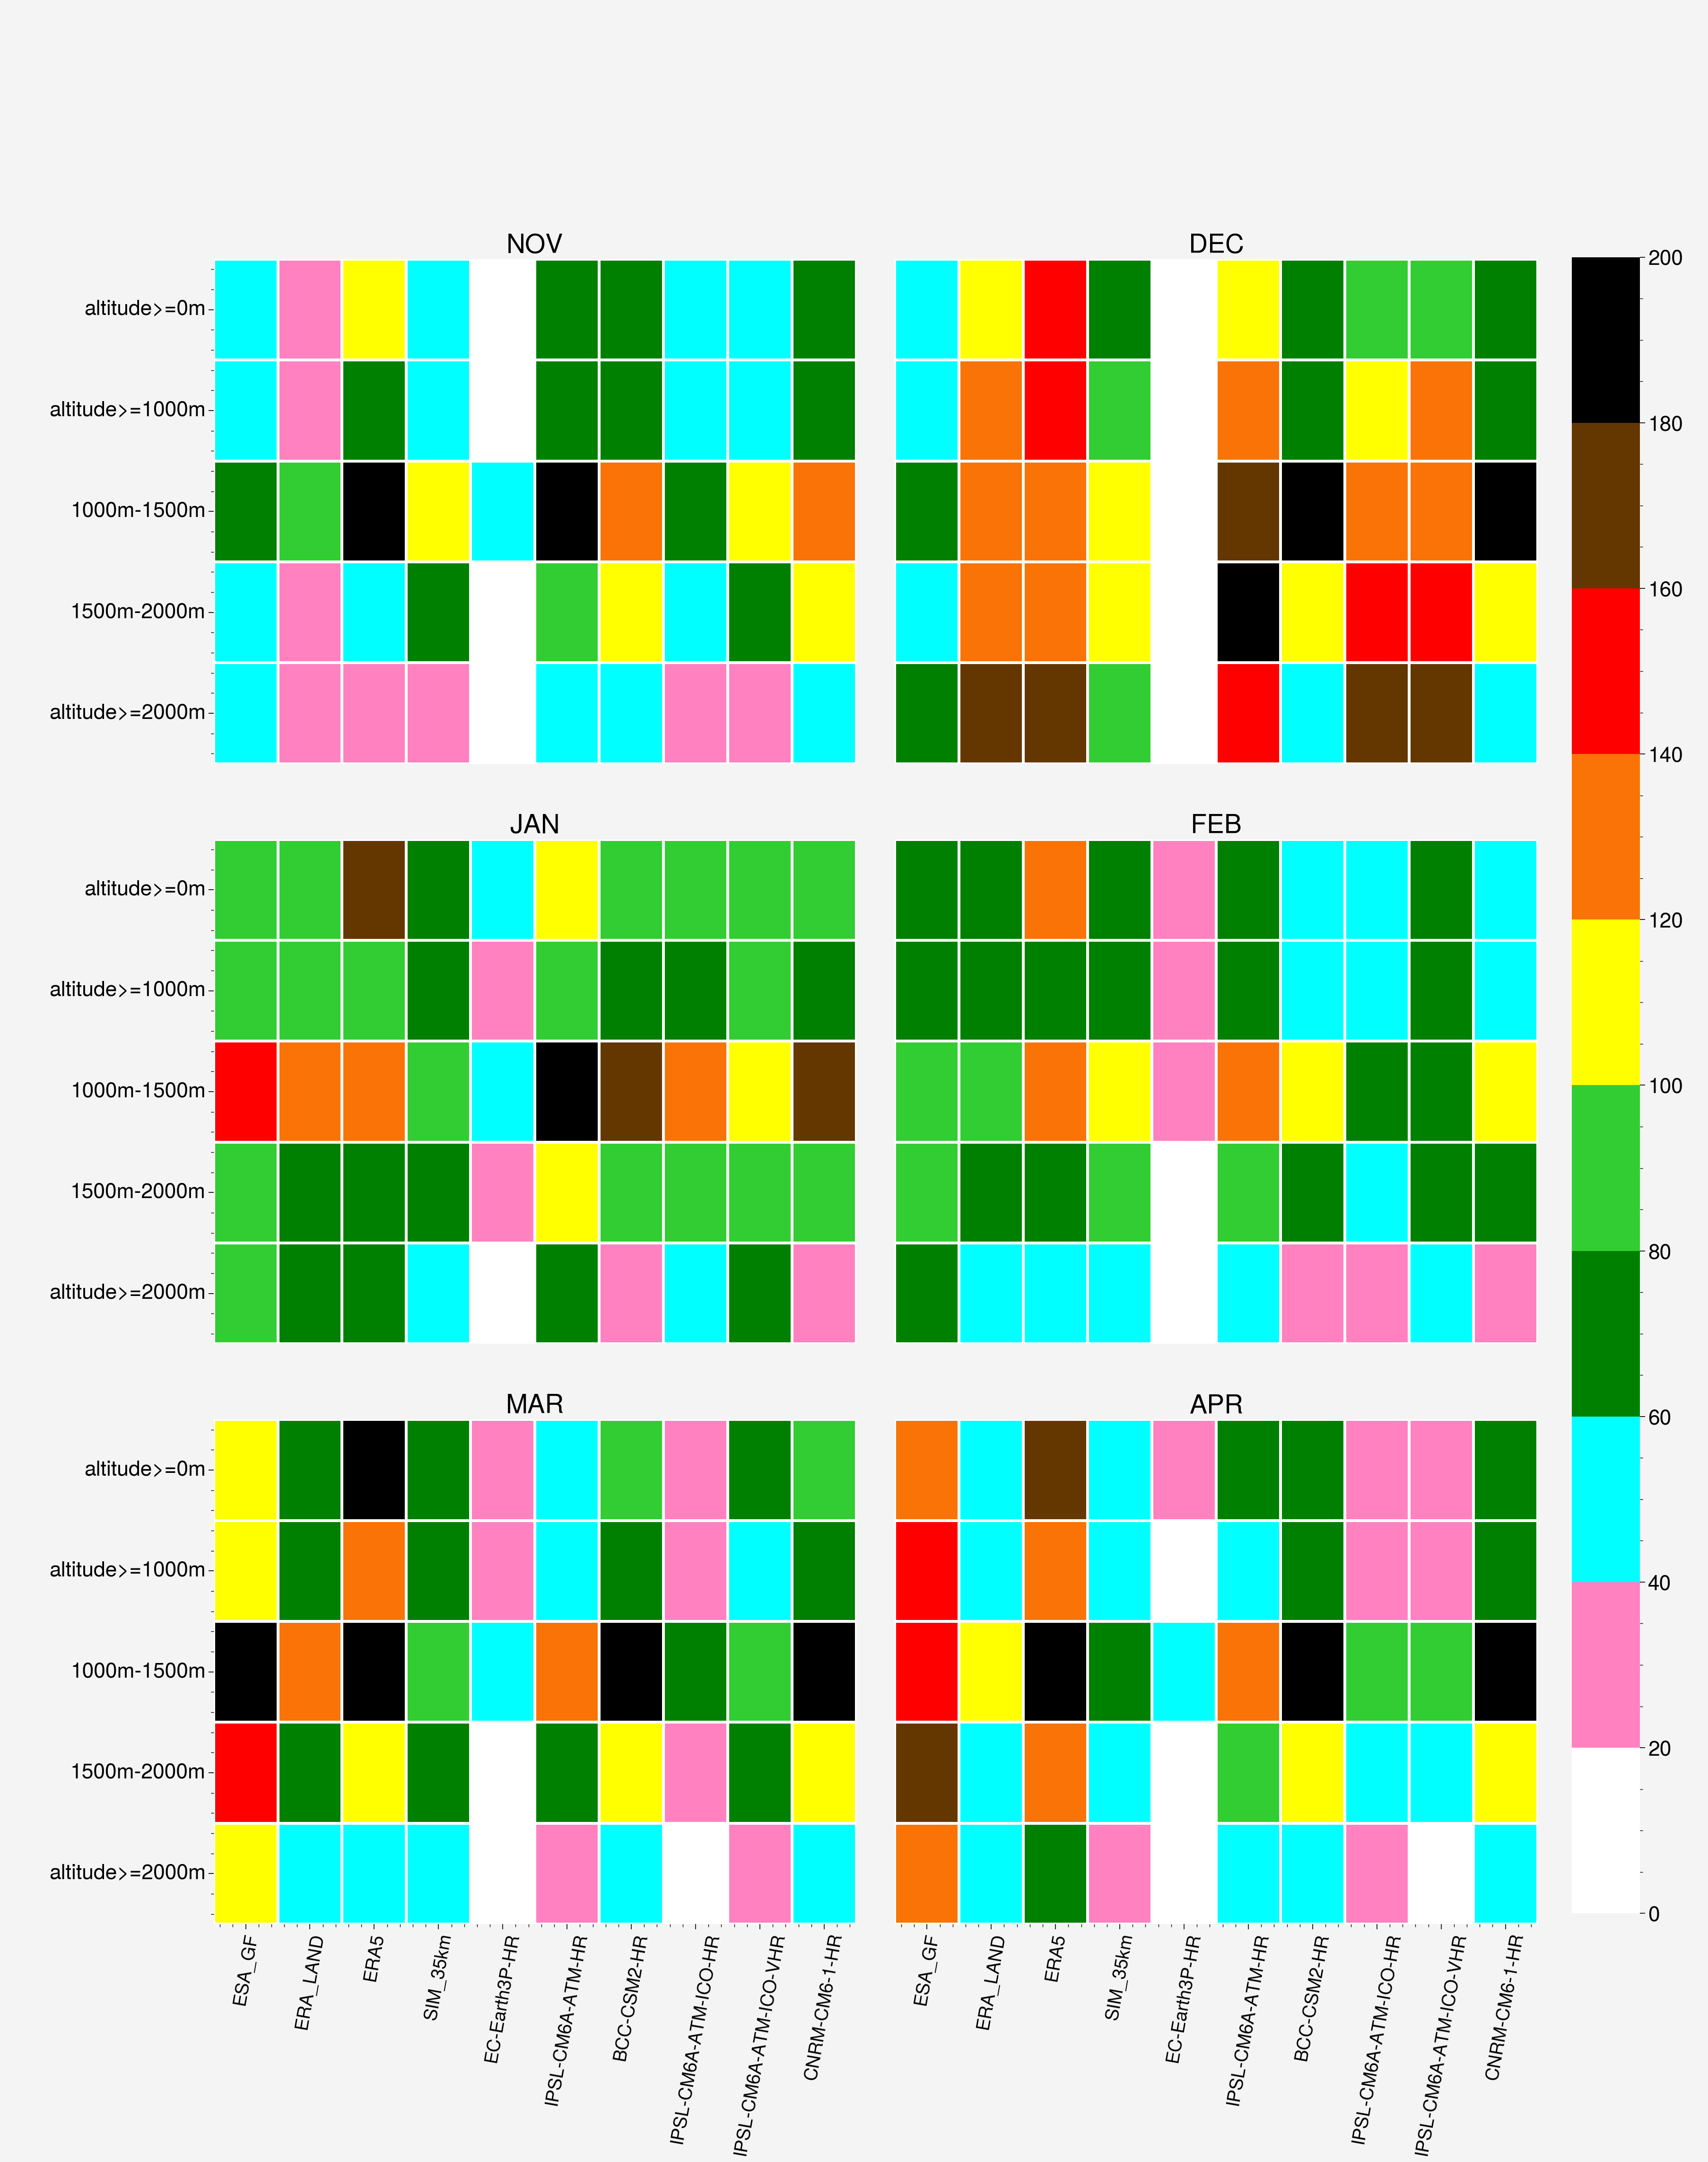

In [15]:
vmax = 200
vmin = 0
for ipar,par in enumerate(parameters):
    if ipar==1:
        vmax = 200
        vmin = 0
        
    fig, axs = plt.subplots(nrows=3,ncols=2, dpi=100) #   figsize=(11,8.5)
    # Formatting figure                
    plt.subplots_adjust(wspace=0.06,hspace=0.15)   
    set_size(14,17.6)  
    # Add a colorbar axis at the bottom of the graph
    cbar_ax = fig.add_axes([0.92, 0.115, 0.04, 0.766])
    
    # Axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array as follow 
    axs=axs.flatten()

    for imon,mon in enumerate(months_labels):
        data = data_dic[par][mon].round(1)  
        if imon == 0 or imon==2:
            sns.heatmap(data_dic[par][mon].round(1),annot=False, 
                         cbar=False,xticklabels=[],yticklabels=bounds_labels,
                         cmap=cmap_init,ax=axs[imon], linecolor='white',linewidth=2) 
        elif imon==4: 
            sns.heatmap(data_dic[par][mon].round(1),annot=False, 
                         cbar=False,yticklabels=bounds_labels,
                             cmap=cmap_init,ax=axs[imon],linecolor='white',linewidth=2)
        elif imon==5:
            sns.heatmap(data_dic[par][mon].round(1),annot=False, 
                         cbar=False,yticklabels=[],cmap=cmap_init,
                             ax=axs[imon],linecolor='white',linewidth=2)
        elif imon==3:
            c_map = sns.heatmap(data_dic[par][mon].round(1),annot=False, 
                         cbar=True,yticklabels=[], xticklabels=[],cmap=cmap_init,
                             ax=axs[imon], cbar_ax=cbar_ax,vmin=vmin,
                             vmax=vmax, linecolor='white',linewidth=2)
        else:
            sns.heatmap(data_dic['snc_monthly_value_15']['JAN'].round(1),annot=False, 
                         cbar=False,yticklabels=[], xticklabels=[],cmap=cmap_init,
                             ax=axs[imon],linecolor='white',linewidth=2)
            
        axs[imon].set_ylabel('')
        
        axs[imon].set_title(mon, fontsize=20)

        
    axs[4].set_xlabel(' '*100+'products names', fontsize=20)
    
    for iax in [0,2,4]:
        axs[iax].set_yticklabels(labels=bounds_labels, rotation = 0, fontsize=16)   
        
    for iax in [4,5]:
        axs[iax].set_xticklabels(labels=products_labels, rotation = 80, fontsize=14)   
        
    c_bar = c_map.collections[0].colorbar
    c_bar.set_ticks([i for i in range(0,201,20)])
    c_bar.set_ticklabels([i for i in range(0,201,20)])
    c_bar.ax.tick_params(labelsize=16) 
    # Store figures         
    #plt.savefig(path_output+'/'+par+'_var_coeff_spatial_average_monthly_threshold_'+threshold+'.pdf')         
    #plt.savefig(path_output+'/'+par+'_var_coeff_spatial_average_monthly_threshold_'+threshold+'.png')         